<h1>Outliers</h1>

<h3>Outliers are the most extreme values in the data. It is an abnormal observations that deviate from norm. They do not fit in normal behaviour of data.</h3>

<h4>Outliers can be detected by:</h4><br>
<ul>
    <li>Boxplot</li>
    <li>Histogram</li>
    <li>Scatterplot</li>
    <li>Z-score</li>
    <li>Inter Quartile Range</li>
</ul>

<h4>Outliers can be handled in the following ways:</h4><br>
<ul>
    <li>Rmove the outliers</li>
    <li>Replace outliers with suitable values by using <b>quantile method</b> and <b>interquartile range</b></li>
    <li>Use ml models which are not sensitive to outliers<br>Ex: KNN, Desicion Trees,, SVM, Naive Bayes, Ensemble methods</li>
</ul>

<h1>Different Techniques to Identify Outliers</h1>

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_sales = pd.read_csv("raw_sales.csv")
raw_sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [3]:
def find_outliers(data):
    
    outliers = []     # list to store outliers in the data
    
    data_std = statistics.stdev(data)     # calculate standard deviation of the data
    data_mean = statistics.mean(data)     # calcuate mean of the data
    
    outlier_cutoff = 3 * data_std  # basically 3σ 
    
    minimum_value = data_mean - outlier_cutoff
    maximum_value = data_mean + outlier_cutoff
    
    for value in data:
        if (value > maximum_value) | (value < minimum_value):
            outliers.append(value)
    return outliers

In [4]:
number_of_outliers = find_outliers(raw_sales['price'])
print(number_of_outliers)

print(len(number_of_outliers))

[1530000, 1780000, 1460000, 3500000, 2100000, 1580000, 2600000, 1875000, 2200000, 1620000, 1562500, 2350000, 1580000, 7300000, 1670000, 1780000, 2400000, 1530000, 1567140, 1700000, 1675000, 2060000, 1750000, 1500000, 1725000, 1455000, 2000000, 1475000, 4150000, 1780000, 1650000, 2500000, 5425000, 2200000, 2375000, 2100000, 1950000, 1980000, 1525000, 1900000, 1460000, 1500000, 1500000, 2760000, 1550000, 1605000, 1730000, 1650000, 1575000, 1530000, 1510000, 1501000, 1880000, 1620000, 1650000, 1470000, 1495000, 1600000, 1910000, 1485000, 1965000, 1640000, 1777500, 1500000, 1480000, 1650000, 1625000, 1540000, 2600000, 1900000, 3160000, 1975000, 1555000, 1900000, 1785000, 1701000, 1510000, 2080000, 3400000, 2050000, 1510000, 2550000, 1900000, 1801000, 1950000, 3400000, 1650000, 1915000, 1870000, 1560000, 2400000, 2090000, 1490000, 1670000, 1550000, 1560000, 1700000, 1800000, 1900000, 1710000, 1475000, 2125000, 1600000, 1675000, 1952500, 1670000, 1665000, 2150000, 1460000, 1715000, 1750000, 

In [5]:
461/29580 * 100

# It is 1.55%. If the data is fully normally distributed the outliers percent should be 0.3%. So, clearly it is not normally distributed.

1.5584854631507776

In [6]:
raw_sales.price.skew()      # 4.31 indicates that data is positively skewed

4.312009366902366

In [7]:
import seaborn as sns

C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

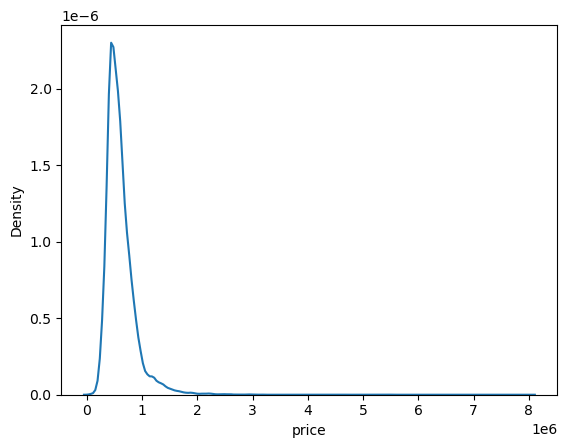

In [8]:
sns.kdeplot(data=raw_sales,x=raw_sales.price)

In [9]:
# Apply log on the price data

raw_sales['transformed_price'] = np.log(raw_sales['price'])
print(raw_sales)

                  datesold  postcode   price propertyType  bedrooms  \
0      2007-02-07 00:00:00      2607  525000        house         4   
1      2007-02-27 00:00:00      2906  290000        house         3   
2      2007-03-07 00:00:00      2905  328000        house         3   
3      2007-03-09 00:00:00      2905  380000        house         4   
4      2007-03-21 00:00:00      2906  310000        house         3   
...                    ...       ...     ...          ...       ...   
29575  2019-07-25 00:00:00      2900  500000         unit         3   
29576  2019-07-25 00:00:00      2612  560000         unit         2   
29577  2019-07-26 00:00:00      2912  464950         unit         2   
29578  2019-07-26 00:00:00      2601  589000         unit         2   
29579  2019-07-26 00:00:00      2612  775000         unit         2   

       transformed_price  
0              13.171154  
1              12.577636  
2              12.700769  
3              12.847927  
4           

In [10]:
raw_sales['transformed_price'].skew()    # now it came near 0.

0.4731646269984763

In [11]:
df = find_outliers(raw_sales['transformed_price'])
print(df)

[14.392123922268269, 11.816726919301892, 15.068273526459642, 14.557447902693651, 11.512925464970229, 14.77102200299171, 14.444119217386648, 14.603967918328545, 14.669925886120343, 15.80338490611862, 14.392123922268269, 14.690979295318174, 11.608235644774552, 14.538216540765763, 14.375126345899696, 14.508657738524219, 15.238618892206881, 14.392123922268269, 14.73180128983843, 15.506528457390797, 14.603967918328545, 14.68050799545088, 14.557447902693651, 14.48333993053993, 14.498607402670718, 14.457364444136669, 14.830741237693333, 11.813030057420567, 14.446782334806132, 11.982929094215963, 11.33857207782545, 11.141861783579396, 12.072541252905651, 14.462613800022813, 14.491002803285499, 12.058152515453552, 14.390718440659533, 11.350406535472453, 14.77102200299171, 14.457364444136669, 14.966082585563095, 14.496078956317358, 14.457364444136669, 14.394928973195876, 14.547878451677501, 15.03928598958639, 14.53335035111459, 14.75160391713461, 14.457364444136669, 14.403852624158093, 14.483339

In [12]:
print(len(df))

266


In [13]:
266/29580 * 100

# Now the the valye 0.89 is better than 1.55%

0.8992562542258282

C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='transformed_price', ylabel='Density'>

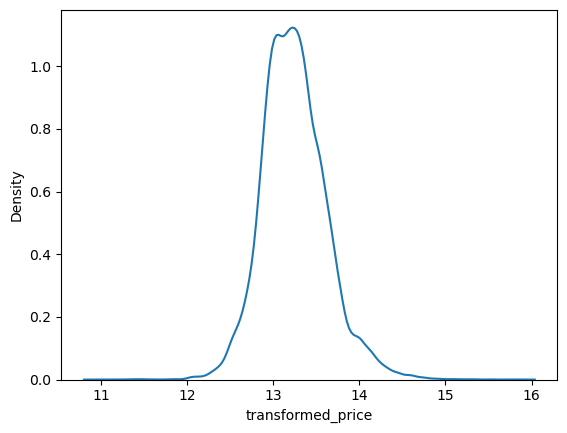

In [14]:
sns.kdeplot(data=raw_sales,x=raw_sales.transformed_price)

# it is also not normally distributed but it is closer to it

In [15]:
## double log transformation

raw_sales['double_transformed_price'] = np.log(raw_sales['transformed_price'])
print(raw_sales)

                  datesold  postcode   price propertyType  bedrooms  \
0      2007-02-07 00:00:00      2607  525000        house         4   
1      2007-02-27 00:00:00      2906  290000        house         3   
2      2007-03-07 00:00:00      2905  328000        house         3   
3      2007-03-09 00:00:00      2905  380000        house         4   
4      2007-03-21 00:00:00      2906  310000        house         3   
...                    ...       ...     ...          ...       ...   
29575  2019-07-25 00:00:00      2900  500000         unit         3   
29576  2019-07-25 00:00:00      2612  560000         unit         2   
29577  2019-07-26 00:00:00      2912  464950         unit         2   
29578  2019-07-26 00:00:00      2601  589000         unit         2   
29579  2019-07-26 00:00:00      2612  775000         unit         2   

       transformed_price  double_transformed_price  
0              13.171154                  2.578029  
1              12.577636                 

In [16]:
out2 = find_outliers(raw_sales['double_transformed_price'])
print(out2)

[2.469516063250643, 2.7125914424696296, 2.6781027459965556, 2.443470357682056, 2.6926672886648078, 2.6702873571464947, 2.681293267018076, 2.685799540071259, 2.7602241516524435, 2.687233652042676, 2.4517148155804023, 2.6767808057627542, 2.6747455566574194, 2.7238329222809696, 2.6900085101561477, 2.741261126048661, 2.681293267018076, 2.6865206271823907, 2.6781027459965556, 2.67299901854652, 2.6740526036191548, 2.6712039348441956, 2.6967021372131965, 2.469203164398985, 2.6704717139705427, 2.483483061484839, 2.428210371308124, 2.4107093465297047, 2.490933555856897, 2.671566961116171, 2.673527960513875, 2.489740988473999, 2.4292535613892587, 2.6926672886648078, 2.6712039348441956, 2.7057864798550955, 2.673878196051612, 2.6712039348441956, 2.67744517210479, 2.7106658432981137, 2.676446032634445, 2.6913518170187674, 2.6712039348441956, 2.67299901854652, 2.7106658432981137, 2.671747712973357, 2.670102473917304, 2.687233652042676, 2.677774799675404, 2.6712039348441956, 2.678915364384639, 2.6730

In [17]:
print(len(out2))

251


In [18]:
251/29580 * 100

# somewhat reduced than first transformed_price

0.8485463150777552

In [19]:
raw_sales.double_transformed_price.skew()

# much reduced the skewness

0.33092530655758573

C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='double_transformed_price', ylabel='Density'>

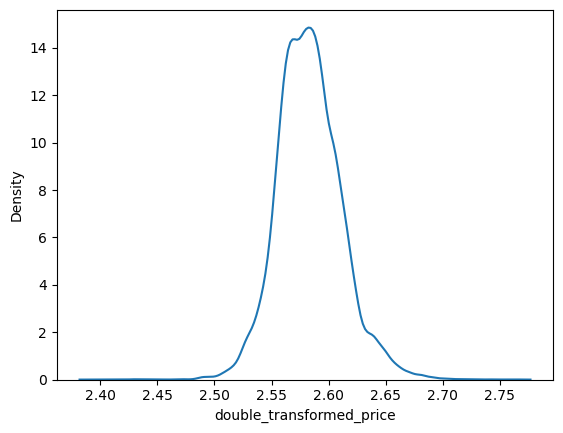

In [20]:
sns.kdeplot(data=raw_sales,x=raw_sales.double_transformed_price)

<h1>Box plot and Scatterplot</h1>

<Axes: ylabel='price'>

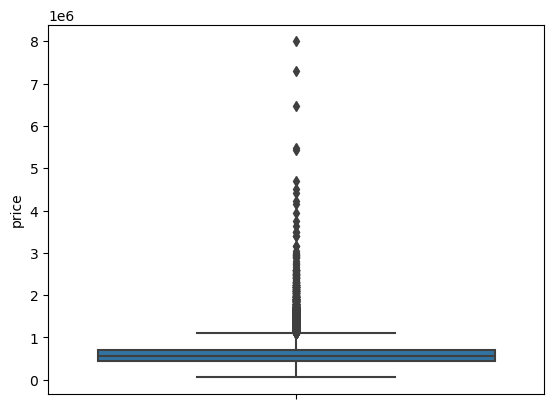

In [21]:
import seaborn as sns

sns.boxplot(data=raw_sales,y=raw_sales.price)

In [22]:
raw_sales['Index'] = raw_sales.index

<Axes: xlabel='Index', ylabel='price'>

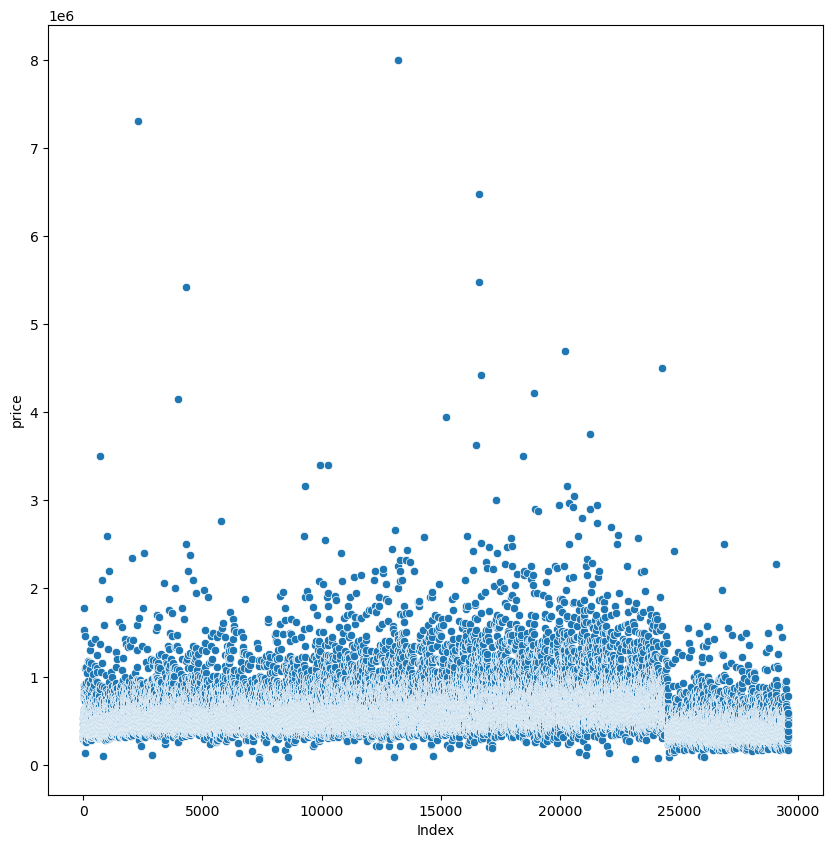

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=raw_sales,x=raw_sales.Index,y=raw_sales.price)

In [24]:
sales_data = pd.DataFrame(raw_sales)
sales_data.describe()

,postcode,price,bedrooms,transformed_price,double_transformed_price,Index
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199,14789.500000
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183,8539.154818
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608,0.000000
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529,7394.750000
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555,14789.500000
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165,22184.250000
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002,29579.000000


<h1>Inter Quartile Range</h1>

<h2>IQR = Q3 - Q1</h2>

In [27]:
list1 = [43,54,56,61,62,66,68,69,69,70,71,72,77,78,79,85,87,88,89,93,95,96,98,99,99]

In [28]:
print(len(list1))

25


In [29]:
print(max(list1))

99


In [30]:
print(min(list1))

43


In [32]:
import statistics

statistics.mean(list1)

76.96

In [33]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

<h3>To find 90th percentile for these scores, start by multilying 90 percent times the total number of scores,which gives (90% * 25) = (0.9 * 25) = 22.5 . rounding to nearest integer 23.</h3>
<h3>The element at the 23 index is the 90% percentile of these scores.</h3>

In [46]:
round(0.9 * 25)

22

In [47]:
list1[22]

98

<h3>20th percentile of the given scores</h3>

In [41]:
round(0.20 * 25)

5

In [44]:
(list1[4] + list1[5])/2

64.0